
# 계층형 군집분석

#### 01. 계층형 군집분석 (거리함수로 나누어보고 Dendrogram그려보기)

텍스트 분석 후 가까운 거리끼리 군집

In [39]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [40]:
stop_words = stopwords.words('english')

stop_words = stop_words + list(string.printable)

In [41]:
lemmatizer = WordNetLemmatizer() # 어근 추출

In [42]:
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

In [43]:
# Counter로 카테고리 빈도 분석
Counter(news_data.target)

Counter({0: 585, 1: 591, 2: 377})

In [44]:
# 데이터프레임 형태로 만든 다음 추가 작업을 주로 한다.
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category' : news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [45]:
# 전처리를 해줘야 한다. 
news_data_df['cleaned_text'] = news_data_df['text'].apply(lambda x : ' '.join(lemmatizer.lemmatize(word.lower()) for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words))

In [46]:
news_data_df.head()

,text,category,cleaned_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...


In [47]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [48]:
# 코사인 유사도 -> 텍스트끼리의 유사도 계산
dist = 1 - cosine_similarity(tfidf_df) # 거리함수
linkage_matrix = ward(dist)

In [53]:
dist, dist.shape

(array([[ 1.11022302e-16,  8.43535388e-01,  9.19068687e-01, ...,
          7.83427216e-01,  9.37050396e-01,  6.49532085e-01],
        [ 8.43535388e-01,  0.00000000e+00,  8.81242212e-01, ...,
          7.36387372e-01,  9.40398704e-01,  9.26383255e-01],
        [ 9.19068687e-01,  8.81242212e-01,  2.22044605e-16, ...,
          7.97370089e-01,  8.07244593e-01,  8.54378632e-01],
        ...,
        [ 7.83427216e-01,  7.36387372e-01,  7.97370089e-01, ...,
          1.11022302e-16,  9.07879049e-01,  9.40377811e-01],
        [ 9.37050396e-01,  9.40398704e-01,  8.07244593e-01, ...,
          9.07879049e-01, -2.22044605e-16,  8.80084259e-01],
        [ 6.49532085e-01,  9.26383255e-01,  8.54378632e-01, ...,
          9.40377811e-01,  8.80084259e-01,  0.00000000e+00]]),
 (1553, 1553))

In [55]:
linkage_matrix, linkage_matrix.shape

(array([[9.95000000e+02, 1.30300000e+03, 0.00000000e+00, 2.00000000e+00],
        [1.00000000e+01, 4.17000000e+02, 0.00000000e+00, 2.00000000e+00],
        [1.81000000e+02, 1.28300000e+03, 0.00000000e+00, 2.00000000e+00],
        ...,
        [3.09900000e+03, 3.10100000e+03, 3.96245413e+01, 1.04500000e+03],
        [3.10000000e+03, 3.10200000e+03, 4.64775182e+01, 1.24400000e+03],
        [3.09700000e+03, 3.10300000e+03, 5.42898545e+01, 1.55300000e+03]]),
 (1552, 4))

In [63]:
linkage_matrix[0]

array([ 995., 1303.,    0.,    2.])

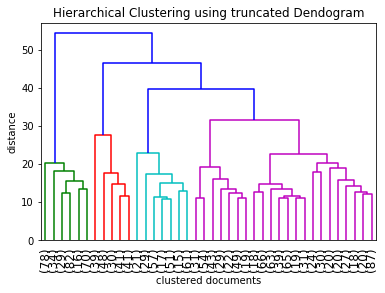

In [57]:
# Truncating the Dendogram Truncation to show last 4 clusters
plt.title("Hierarchical Clustering using truncated Dendogram")
plt.xlabel("clustered documents")
plt.ylabel("distance")

dendrogram(linkage_matrix, truncate_mode = 'lastp', p=40, leaf_rotation=90, leaf_font_size=12)
plt.show()

In [58]:
# Let's create 4 cluster from the linkage matrix
k = 4
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

In [59]:
news_data_df['obtained_clusters'] = clusters

In [60]:
pd.crosstab(news_data_df['category'].replace({0 : 'misc.forsale', 1 : 'sci.electronics',  2 : 'talk.religion.misc'}), news_data_df['obtained_clusters'].replace(\
{1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4 : 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,155,0,230,200
sci.electronics,110,1,19,461
talk.religion.misc,44,198,2,133
